In [2]:
from process import wrappers

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib  import cm

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

# Chart of Nuclides

**CmdNuChart** is a wrapper for the API (https://www-nds.iaea.org/relnsd/vcharthtml/api_v0_guide.html) of the Livechart- Table of Nuclides from iaea (https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html).

Before launching lazyspectra, it is helpful to get use to it.

**NB:** You need an internet connection to make it work 

## Class and methods

In [4]:
CmdNuchart = wrappers.CmdNuChart()

You can get different dataframe from the livechart:

    * CmdNuchart.get_nu_chart()  returns the ground state for all the nuclides
    * CmdNuchart.get_nu_chart(nuclide="166Ho") returns the ground state of just the 166Ho

    * CmdNuchart.get_nuclear_levels(nuclide="166Ho") returns the nuclear levels of the 166Ho

    * CmdNuchart.get_decays(nuclide="166Ho",dtype="bm") returns the beta - decay of 166Ho

In [10]:
CmdNuchart.get_nu_chart()

In [12]:
df = CmdNuchart.get_df() # returns the dataframe in memory
df

,z,n,symbol,radius,unc_r,abundance,abundance_unc,energy_shift,energy,unc_e,...,unc_sp,binding,unc_ba,atomic_mass,unc_am,massexcess,unc_me,ENSDFpublicationcut-off,ENSDFauthors,Extraction_date
0,0,1,Nn,-0.1149,0.0027,,NaN,,0,,...,NaN,0,0,1008664.9159,47,8071.318060,44,31-Oct-2005,BALRAJ SINGH,2022-04-26
1,0,4,N,,NaN,,NaN,,0,,...,,,,,,NaN,,30-Aug-2017,J.E. Purcell and C.G. Sheu,2022-04-26
2,0,6,N,,NaN,,NaN,,0,,...,,,,,,NaN,,15-March-2017,J.H. Kelley and G.C. Sheu,2022-04-26
3,1,0,H,0.8783,0.0086,99.9855,78,,0,,...,0,0,0,1007825.031898,14,7288.971064,13,31-Oct-2005,BALRAJ SINGH,2022-04-26
4,1,1,H,2.1421,0.0088,0.0145,78,,0,,...,4,1112.2831,2,2014101.777844,15,13135.722895,15,1-May-2003,J.H. KELLEY and J.L. GODWIN,2022-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362,116,177,Lv,,NaN,,NaN,,0,,...,869,7111,2,293204583,553,190568.000000,515,12-Aug-2005,M. GUPTA and THOMAS W. BURROWS,2022-04-26
3363,116,178,Lv,,NaN,,NaN,,0,,...,,,,,,NaN,,31-Jan-2019,BALRAJ SINGH,2022-04-26
3364,117,176,Ts,,NaN,,NaN,X,,,...,1090,7095,3,293208727,835,194428.000000,778,1-August-2010,M. GUPTA,2022-04-26
3365,117,177,Ts,,NaN,,NaN,,0,,...,785,7092,2,294210840,637,196397.000000,593,31-Jan-2019,BALRAJ SINGH,2022-04-26


In [13]:
# print all the labels in the dataframe
for label in CmdNuchart.get_df_labels():
    print(label)

z
n
symbol
radius
unc_r
abundance
abundance_unc
energy_shift
energy
unc_e
ripl_shift
jp
half_life
operator_hl
unc_hl
unit_hl
half_life_sec
unc_hls
decay_1
decay_1_%
unc_1
decay_2
decay_2_%
unc_2
decay_3
decay_3_%
unc_3
isospin
magnetic_dipole
unc_md
electric_quadrupole
unc_eq
qbm
unc_qb
qbm_n
unc_qbmn
qa
unc_qa
qec
unc_qec
sn
unc_sn
sp
unc_sp
binding
unc_ba
atomic_mass
unc_am
massexcess
unc_me
ENSDFpublicationcut-off
ENSDFauthors
Extraction_date


In [21]:
# return the coloumn(s) with the specified label as numpy ndarray
z = CmdNuchart.get_array("z")
print("z = " ,z)
dataset = CmdNuchart.get_array(["z","symbol","radius"])
print("dataset = \n" ,dataset)

z =  [  0   0   0 ... 117 117 118]
dataset = 
 [[0.0 'Nn' -0.1149]
 [0.0 'N' nan]
 [0.0 'N' nan]
 ...
 [117.0 'Ts' nan]
 [117.0 'Ts' nan]
 [118.0 'Og' nan]]


In [29]:
#returns the rows with a value different from " "
rows_non_empty = CmdNuchart.get_index_non_empty("abundance")
print(rows_non_empty)

[   3    4   10   11   20   21   30   41   42   57   58   71   72   87
   88   89  103  121  122  123  142  162  163  164  185  208  209  210
  231  253  254  255  257  275  277  299  301  303  323  324  325  347
  349  350  351  353  355  373  397  398  399  400  401  424  425  450
  452  453  454  481  509  511  512  513  541  570  572  573  574  576
  604  606  634  636  637  638  640  666  668  696  698  699  700  702
  729  757  759  760  761  763  765  789  791  819  821  823  824  825
  827  857  859  890  892  893  894  928  964  965  966  968  970 1001
 1037 1039 1040 1041 1042 1043 1045 1113 1115 1116 1117 1118 1119 1121
 1157 1195 1197 1198 1199 1201 1203 1240 1242 1278 1280 1282 1283 1284
 1285 1286 1288 1324 1326 1362 1364 1365 1366 1367 1368 1369 1370 1372
 1374 1409 1411 1447 1449 1450 1451 1452 1453 1455 1457 1491 1528 1530
 1532 1533 1534 1535 1536 1538 1540 1576 1612 1614 1616 1617 1618 1619
 1620 1656 1657 1691 1693 1695 1697 1732 1770 1771 1772 1773 1774 1776
 1778 

## Some (useful ?) examples 

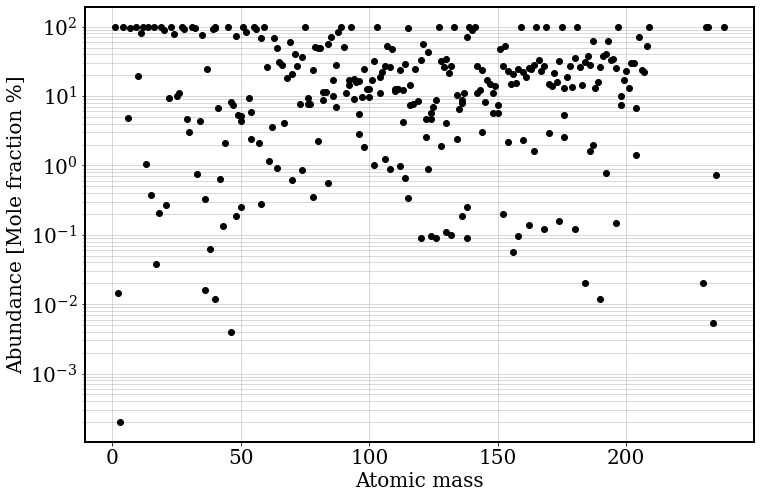

In [59]:
# Plot the abundance vs atomic mass

CmdNuchart.get_nu_chart()

index_non_empty = CmdNuchart.get_index_non_empty("abundance")

z = CmdNuchart.get_array("z")[index_non_empty]
n = CmdNuchart.get_array("n")[index_non_empty]
abundance = CmdNuchart.get_array("abundance")[index_non_empty]
symbol = CmdNuchart.get_array("symbol")[index_non_empty]

a = z+n

plt.plot(a,abundance,'o',color='k')

plt.yscale("log")
plt.grid(True, which="both",alpha=0.6)
plt.xlabel("Atomic mass")
plt.ylabel("Abundance [Mole fraction %]")
plt.show()

In [111]:
# Print the name and Q-values of the nuclides which decays via beta- decay with Q value greater than 5000 keV
Q_max = 5000

rows_withQ = CmdNuchart.get_index_non_empty("qbm")

Q = CmdNuchart.get_array("qbm")[rows_withQ].astype(float)

rows_selected = np.where(Q >= Q_max)[0]

Q = Q[rows_selected]
symbol = CmdNuchart.get_array("symbol")[rows_withQ[rows_selected]]
z = CmdNuchart.get_array("z")[rows_withQ[rows_selected]]
n = CmdNuchart.get_array("n")[rows_withQ[rows_selected]]

nuclide_name = (z+n).astype(str)+symbol

for i in range(len(rows_selected)):
    print("Nuclide:", nuclide_name[i] , "-> Q = ", Q[i])

Nuclide: 4H -> Q =  22196.2131
Nuclide: 5H -> Q =  21661.2131
Nuclide: 6H -> Q =  24283.6294
Nuclide: 7H -> Q =  23062.0
Nuclide: 7He -> Q =  11166.0229
Nuclide: 8He -> Q =  10663.8784
Nuclide: 9He -> Q =  15980.9213
Nuclide: 10He -> Q =  16144.5191
Nuclide: 8Li -> Q =  16004.1329
Nuclide: 9Li -> Q =  13606.4541
Nuclide: 10Li -> Q =  20445.1411
Nuclide: 11Li -> Q =  20551.0898
Nuclide: 12Li -> Q =  23931.8152
Nuclide: 11Be -> Q =  11509.4607
Nuclide: 12Be -> Q =  11708.3636
Nuclide: 13Be -> Q =  17097.1315
Nuclide: 14Be -> Q =  16290.8166
Nuclide: 15Be -> Q =  20868.4411
Nuclide: 16Be -> Q =  20335.4399
Nuclide: 12B -> Q =  13369.3979
Nuclide: 13B -> Q =  13436.9387
Nuclide: 14B -> Q =  20643.7926
Nuclide: 15B -> Q =  19084.2343
Nuclide: 16B -> Q =  23417.5656
Nuclide: 17B -> Q =  22684.4422
Nuclide: 18B -> Q =  26873.3742
Nuclide: 19B -> Q =  27356.4961
Nuclide: 20B -> Q =  31898.0019
Nuclide: 21B -> Q =  32740.0
Nuclide: 15C -> Q =  9771.7071
Nuclide: 16C -> Q =  8010.226
Nuclide: 17

Nuclide: 181Tm -> Q =  5649.0
Nuclide: 185Yb -> Q =  5480.0
Nuclide: 184Lu -> Q =  5199.0
Nuclide: 186Lu -> Q =  6104.0
Nuclide: 187Lu -> Q =  5230.0
Nuclide: 188Lu -> Q =  7009.0
Nuclide: 190Ta -> Q =  5649.0
Nuclide: 192Ta -> Q =  6520.0
Nuclide: 193Ta -> Q =  5380.0
Nuclide: 194Ta -> Q =  7280.0
Nuclide: 197W -> Q =  5480.0
Nuclide: 194Re -> Q =  5175.0
Nuclide: 196Re -> Q =  5918.0
Nuclide: 198Re -> Q =  6610.0
Nuclide: 199Re -> Q =  5541.0
Nuclide: 201Os -> Q =  5000.0
Nuclide: 203Os -> Q =  7100.0
Nuclide: 200Ir -> Q =  5030.0
Nuclide: 202Ir -> Q =  6052.0
Nuclide: 203Ir -> Q =  5140.0
Nuclide: 204Ir -> Q =  8050.0
Nuclide: 205Ir -> Q =  7220.0
Nuclide: 205Pt -> Q =  5750.0
Nuclide: 207Pt -> Q =  6501.0
Nuclide: 208Pt -> Q =  5410.0
Nuclide: 206Au -> Q =  6755.0
Nuclide: 207Au -> Q =  5847.0
Nuclide: 208Au -> Q =  7355.0
Nuclide: 209Au -> Q =  6380.0
Nuclide: 210Au -> Q =  7980.0
Nuclide: 209Hg -> Q =  5035.0
Nuclide: 211Hg -> Q =  5688.0
Nuclide: 213Hg -> Q =  6416.0
Nuclide: 21

# Betashape

In [3]:
CmdBEtashape = wrappers.CmdBetaShape()

First, you shoud read how betashape works. Search its documentation!

In [15]:
# Tell the class where to find Betashape folder in the system 

betashape_path = "/where/is/betasthape/BetaShape_v2.2"                       
#betashape_path = "/home/matteo/Scrivania/neutrino_oscillation/BetaShape_v2.2"
CmdBEtashape.set_betashape(betashape_path)

In [5]:
# Set the output path (where to save the Betashape output file)
#output_path = "/home/matteo/Scrivania/neutrino_oscillation/test"
output_path = "/location/to/the/folder/test"

CmdBEtashape.set_save_path(output_path)

Download a ENSDF file. e.g. "166Ho.txt"

In [19]:
# Execute betashape, the output file will be generated in output_path

ensdf_path = "/where/166ho.txt/is/saved"
ensdf_name = "166Ho.txt"

CmdBEtashape.run_betashape(fpath = ensdf_path, fname=ensdf_name,options="myEstep=1 nu=1")

---------------------------------------------------------------------------------------------
BetaShape
Version: 2.2 (05/2021)
Author: X. Mougeot (xavier.mougeot@cea.fr)
CEA, LIST, Laboratoire National Henri Becquerel (LNHB), Gif-sur-Yvette F-91191, France
---------------------------------------------------------------------------------------------

15 B- transitions have been found.
Calculation in progress: |####################################################################################################|  100.00 %  --  Done!

Writing report file... done!
Updating ENSDF file... done!




In [17]:
CmdBEtashape.get_result_state()

'file processed'

To read the rawdata output of betashape, you must select one of the output file and tell the program the corresponding data format ("normal" for the nu total_spectrum, "nupartial" for the single transition)

In [24]:
file = output_path + "/"+ "Ho166/beta-_Ho166_tot_myEstep.bs"
labels, data_matrix = CmdBEtashape.get_data(file,dtype="normal")

In [27]:
file = output_path + "/"+ "Ho166/beta-_Ho166_trans0_myEstep.bs"
labels, electron_spectrum, nu_spectrum = CmdBEtashape.get_data(file,dtype="nupartial")